In [1]:
import pandas as pd
import zipfile
import os
import sys
from datetime import datetime
from datetime import timedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

In [2]:
# dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
vars_serg = ["estadoOrden","Ciudad","Departamento",
             "stado_producto","Marca","Pasillo","Categoria",
             "ProductoEnPromocion","cantidadVendida",
             "TotalPagado","Domicilio","PrecioFinal",
             "FechaCreaciónOrden"]

In [3]:
vars_group_b = ["FechaCreaciónOrden",
                'month_year',
                "Ciudad",
                "Departamento",
                "estadoOrden",
                "stado_producto",
                "Marca",
                "Pasillo",
                "Categoria",
                "ProductoEnPromocion"]

In [4]:
df = pd.read_csv("../Data/MERQ_CONS",
                      encoding='latin1',
                     dtype={'estadoOrden' : str,
                            "NombreProducto" : str,
                            "FechaCreaciónOrden" : str,
                            "ProductoEnPromocion" : np.float64,
                            "cantidadVendida" : np.float64},
                 usecols = ['estadoOrden',
                            "NombreProducto",
                            "FechaCreaciónOrden",
                            "ProductoEnPromocion",
                            "cantidadVendida", 
                            "Ciudad", 
                            "Pasillo"])

/home/sebastian/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [60]:
df = pd.read_csv("../Data/AGG_MERQUEO.csv", encoding='latin1')

In [61]:
df.columns

Index(['FechaCreaciónOrden', 'month_year', 'Ciudad', 'Departamento',
       'estadoOrden', 'stado_producto', 'Marca', 'NombreProducto', 'Pasillo',
       'Categoria', 'ProductoEnPromocion', 'TotalPagado', 'cantidadVendida',
       'PrecioFinal', 'cuenta_gr', 'prediction_'],
      dtype='object')

In [62]:
with open("products_filter.txt","r") as f:
    products = f.read().split("\n")

In [63]:
df["FechaCreaciónOrden"] = pd.to_datetime(df.FechaCreaciónOrden)
df.set_index("FechaCreaciónOrden",drop=False,inplace=True)
df = df[(df.NombreProducto.isin(products))]

In [64]:
df.dropna(inplace=True)

In [65]:
def subset_dataframe(df, location,
                     filter_date,
                     sections_selector,
                     section_options,
                     product_options):
    print("_"*10)
    print(location, filter_date, sections_selector, section_options)
    if location == 'All':
        location = ''

    if sections_selector == '':
        sections_selector = ""
        df_sb = df[marks_slider[filter_date[0]]:marks_slider[filter_date[1]]]
        df_sb = df_sb[df_sb.Ciudad.str.contains(location) &
                      df_sb.Pasillo.str.contains(sections_selector) & 
                      df_sb.NombreProducto.str.contains(product_options)]
        return df_sb
    elif sections_selector == 'Custom':

        df_sb = df[marks_slider[filter_date[0]]:marks_slider[filter_date[1]]]
        df_sb = df_sb[df_sb.Ciudad.str.contains(location) &
                      df_sb.Pasillo.isin(section_options)]
        return df_sb
    else:
        print("I'm doing something stupid")

In [66]:
marks_slider = ['2017-7','2018-01']
dff = subset_dataframe(df=df,
                       location='',
                       filter_date=[0,1],
                       sections_selector='',
                       section_options='',
                       product_options=product_options[0])
df_sb_b = dff.resample('D').sum()['cantidadVendida']

# df_sb_b["prediction_2"] = df_sb_b.cantidadVendida.apply(lambda x: x+np.random.randint(low=-15000, high=100))

__________
 [0, 1]  


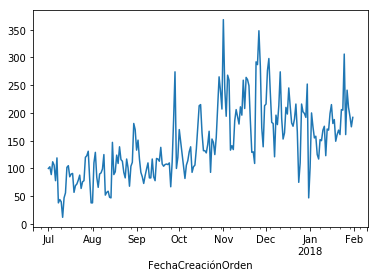

In [67]:
df_sb_b.plot()

In [54]:
product_options[0]

'Papel higiénico Triple hoja'

In [30]:
df = df[(df.NombreProducto.isin(products)) & 
        (df.cantidadVendida<=np.percentile(df.cantidadVendida,q=99))]
df = df["2017-07":]

NameError: name 'products' is not defined

In [55]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras import callbacks
from sklearn import metrics

#configure early stopping
call_back_ = callbacks.EarlyStopping(monitor='val_loss', 
                              min_delta=0.00001, 
                              patience=5, 
                              verbose=1, 
                              mode='auto', 
                              baseline=None
#                               restore_best_weights=False
                                    )


# arreglo de matriz
def create_sequence(serie):
    
    num_feat = 1
    serie_s = serie.copy()
    
    for i in range(num_feat):
        serie = pd.concat([serie,serie_s.shift(-(i+1))],axis=1) 
    serie.dropna(inplace=True)
    
    return serie

numpy.random.seed(7)

In [56]:

def train_test_reshape(serie):
    
    #dividir la data
    train_size = int(len(serie) * 0.7)
    test_size = len(serie) - train_size
    train, test = serie.iloc[0:train_size,:], serie.iloc[train_size:len(serie),:]

    trainX, trainY = train.iloc[:,:-1].values, train.iloc[:,-1].values
    testX, testY = test.iloc[:,:-1].values, test.iloc[:,-1].values

    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    return {'X_train':trainX,'Y_train':trainY,
            'X_test':testX,'Y_test':testY}


In [57]:
data_trainig  = train_test_reshape(serie=create_sequence(serie=df_sb_b))

In [58]:
data_trainig

{'X_train': array([[[ 17.]],
 
        [[ 22.]],
 
        [[ 16.]],
 
        [[ 17.]],
 
        [[ 13.]],
 
        [[ 10.]],
 
        [[ 15.]],
 
        [[ 38.]],
 
        [[ 44.]],
 
        [[ 40.]],
 
        [[ 12.]],
 
        [[ 47.]],
 
        [[ 56.]],
 
        [[ 15.]],
 
        [[ 19.]],
 
        [[ 19.]],
 
        [[  9.]],
 
        [[ 15.]],
 
        [[ 57.]],
 
        [[ 69.]],
 
        [[  6.]],
 
        [[ 11.]],
 
        [[  8.]],
 
        [[ 64.]],
 
        [[ 10.]],
 
        [[ 11.]],
 
        [[ 12.]],
 
        [[ 25.]],
 
        [[ 24.]],
 
        [[ 82.]],
 
        [[ 38.]],
 
        [[ 38.]],
 
        [[ 30.]],
 
        [[ 29.]],
 
        [[ 84.]],
 
        [[ 66.]],
 
        [[ 16.]],
 
        [[ 16.]],
 
        [[ 26.]],
 
        [[ 40.]],
 
        [[ 52.]],
 
        [[ 57.]],
 
        [[ 59.]],
 
        [[ 48.]],
 
        [[ 47.]],
 
        [[ 26.]],
 
        [[ 19.]],
 
        [[ 17.]],
 
        [[ 30.]],
 
        [

In [59]:

# model architecture
model = Sequential()
model.add(LSTM(32, input_shape=(1, 1),return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')
model.summary()
history = model.fit(data_trainig['X_train'], data_trainig['Y_train'],
                    validation_data=(data_trainig['X_test'], data_trainig['Y_test']),
                    epochs=200,
                    batch_size=1,
                    verbose=1,
                    callbacks=[call_back_])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 1, 32)             4352      
_________________________________________________________________
lstm_6 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________
Train on 149 samples, validate on 65 samples
Epoch 1/200
149/149 [==============================] - 2s 15ms/step - loss: 35.3836 - val_loss: 24.9980
Epoch 2/200
149/149 [==============================] - 1s 4ms/step - loss: 27.6049 - val_loss: 21.0546
Epoch 3/200
149/14

KeyboardInterrupt: 

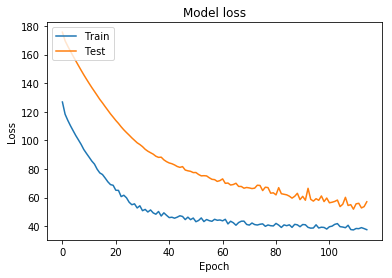

In [37]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

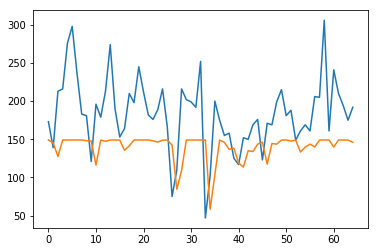

In [58]:
# predicciones
testPredict = model.predict(data_trainig['X_test'])
plt.plot(data_trainig['Y_test'])
plt.plot(testPredict)

In [ ]:
def compute_mae(model,data_trainig):
    testPredict = model.predict(data_trainig['X_test'])
    return metrics.mean_absolute_error(testPredict,data_trainig['Y_test'])

In [ ]:
np.sqrt(metrics.mean_squared_error(testPredict,data_trainig['Y_test']))

In [ ]:

# normalizar los datos (0,1)
scaler = MinMaxScaler(feature_range=(0, 1))
# dataset = scaler.fit_transform(df_ts.iloc[:,1:])
dataset = df_ts.iloc[:,1:].values

In [ ]:
# arreglo de matriz
def create_dataset(dataset, col, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), col]
		dataX.append(a)
		dataY.append(dataset[i + look_back, col])
	return numpy.array(dataX), numpy.array(dataY)
numpy.random.seed(7)

#dividir la data
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

look_back = 1
trainX, trainY = create_dataset(train,columns_model[0][0], look_back)
testX, testY = create_dataset(test,columns_model[0][0], look_back)

trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# predicciones
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# # invertir la normalizacion
# trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform([trainY])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])


# #calcular el rsme
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
# print('Test Score: %.2f RMSE' % (testScore))


# trainPredictPlot = numpy.empty_like(dataset)
# trainPredictPlot[:, :] = numpy.nan
# trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


# testPredictPlot = numpy.empty_like(dataset)
# testPredictPlot[:, :] = numpy.nan
# testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
# plt.show()

In [ ]:
testY.shape

In [ ]:
# modelo 500 - 1 
# # model.add(Dropout(0.5))
# model.add(LSTM(32))
# model.add(Dropout(0.5))
# model.add(Dense(1,activation="relu"))
# model.compile(loss='mean_absolute_error', optimizer='adam')
# history = model.fit(trainX, trainY, 
#                     validation_data=(testX, testY), 
#                     epochs=1000, 
#                     batch_size=15, 
#                     verbose=1,
#                     callbacks=[call_back_])

# modelo 500 - 1 
model = Sequential()
model.add(LSTM(500))
model.add(Dropout(0.7))
model.add(Dense(1,activation="relu"))
model.compile(loss='mean_absolute_error', optimizer='adam')
model.summary()
history = model.fit(trainX, trainY, 
                    validation_data=(testX, testY), 
                    epochs=1000, 
                    batch_size=30, 
                    verbose=1,
                    callbacks=[call_back_])

In [ ]:
# predicciones
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
plt.figure(figsize=(10,7))
plt.plot(testY)
plt.plot(testPredict)